<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/Dataload_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%rm -rf sample_data/

In [3]:
list_dec = pd.read_csv('/content/listings_dec21.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_march = pd.read_csv('/content/listings_march.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_jun = pd.read_csv('/content/listings_jun.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_sep = pd.read_csv('/content/listings_sep.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);

In [4]:
print(list_march.shape, list_jun.shape, list_sep.shape, list_dec.shape)

(37631, 74) (37410, 74) (39881, 75) (38277, 74)


In [15]:
df_listings = pd.concat([list_march,list_jun, list_sep,list_dec])

In [ ]:
#df_listings.head(1)

In [ ]:
#df_listings

In [6]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [16]:
df_listings = df_listings.drop(columns=['listing_url', 'scrape_id', 'description',
                                        'neighborhood_overview', 'picture_url',  'host_url',
      'host_since', 'host_location', 'host_about', 'host_id', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_acceptance_rate', 'last_scraped',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
        'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',  'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights','maximum_nights',
       'availability_365',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
        'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'license', 
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'source'	], axis=1)

In [8]:
df_listings.head()

id                                      name  host_name  \
0  2595                     Skylit Midtown Castle   Jennifer   
1  5121                           BlissArtsSpace!      Garon   
2  5136  Spacious Brooklyn Duplex, Patio + Garden    Rebecca   
3  5178          Large Furnished Room Near B'way　   Shunichi   
4  5203        Cozy Clean Guest Room - Family Apt  MaryEllen   

   host_response_time host_is_superhost neighbourhood_cleansed  \
0  a few days or more                 f                Midtown   
1                 NaN                 f     Bedford-Stuyvesant   
2      within an hour                 f            Sunset Park   
3  within a few hours                 f                Midtown   
4                 NaN                 f        Upper West Side   

  neighbourhood_group_cleansed  latitude  longitude  \
0                    Manhattan  40.75356  -73.98559   
1                     Brooklyn  40.68535  -73.95512   
2                     Brooklyn  40.66265  -73.99454   
3                    Manhattan  40.76457  -73.98317   
4                    Manhattan  40.80380  -73.96751   

                 property_type  ... accommodates    price  \
0           Entire rental unit  ...            1  $150.00   
1  Private room in rental unit  ...            2   $60.00   
2           Entire rental unit  ...            4  $275.00   
3  Private room in rental unit  ...            2   $68.00   
4  Private room in rental unit  ...            1   $75.00   

  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                 4.70                    4.72                       4.62   
1                 4.52                    4.22                       4.09   
2                 5.00                    5.00                       5.00   
3                 4.22                    4.22                       3.74   
4                 4.91                    4.83                       4.82   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.76                         4.79                    4.86   
1                   4.91                         4.91                    4.47   
2                   5.00                         5.00                    4.50   
3                   4.67                         4.43                    4.87   
4                   4.97                         4.95                    4.94   

   review_scores_value  instant_bookable  
0                 4.41                 f  
1                 4.52                 f  
2                 5.00                 f  
3                 4.37                 f  
4                 4.92                 f  

[5 rows x 21 columns]

In [9]:
df_listings.columns

Index(['id', 'name', 'host_name', 'host_response_time', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

## Exploratory Data Analysis


#### Neighbourhoods

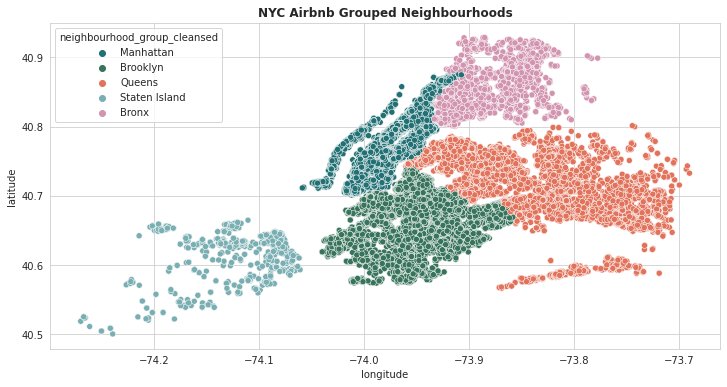

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.longitude,df_listings.latitude,hue=df_listings.neighbourhood_group_cleansed, 
                palette=['#217074','#37745B','#E2725A',"#79AEB2", '#D294AF'])
plt.ioff()
plt.title('NYC Airbnb Grouped Neighbourhoods',fontweight="bold")
plt.show();

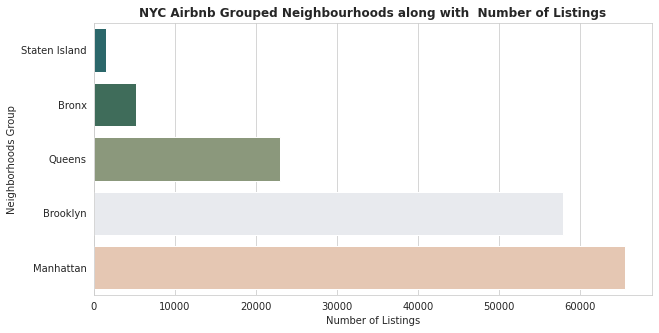

In [11]:
# Which neighborhood has the highest number of listings?
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True).keys(),
        x = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True).values, 
        orient='h', palette=['#217074','#37745B','#8B9D77','#E7EAEF','#EDC5AB']);
plt.title('NYC Airbnb Grouped Neighbourhoods along with  Number of Listings',fontweight="bold")
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighborhoods Group');


In [12]:
df_listings['price'] = df_listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [13]:
fig=px.scatter_mapbox(data_frame=df_listings,
                      lat="latitude",
                      lon="longitude",
                      color="price",
                      hover_data=["price"],
                      hover_name="neighbourhood_group_cleansed",
                      height=500,
                      width=800,
                      size="price",);

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":0,"b":0})
fig.show();

In [ ]:
# Average price per neighborhood
price_per_neighb = df_listings.groupby(['neighbourhood_group_cleansed'])['price'].mean()
price_per_neighb = price_per_neighb.reset_index()

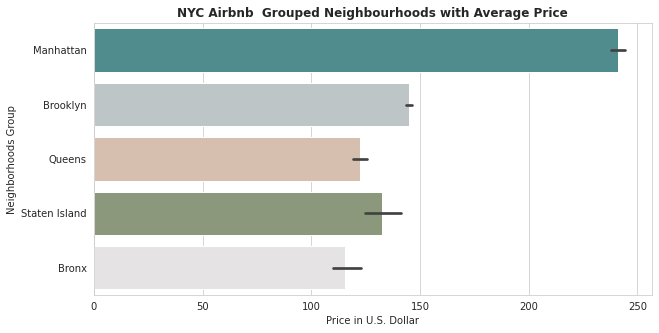

In [ ]:
# Neighborhoods with their average price 
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(y = df_listings['neighbourhood_group_cleansed'], x = df_listings['price'],
                 data = price_per_neighb, orient='h', palette=['#469597','#BBC6C8','#DDBEAA','#8B9D77','#E5E3E4'])
plt.title('NYC Airbnb  Grouped Neighbourhoods with Average Price',fontweight="bold")
ax.set_xlabel('Price in U.S. Dollar')
ax.set_ylabel('Neighborhoods Group');



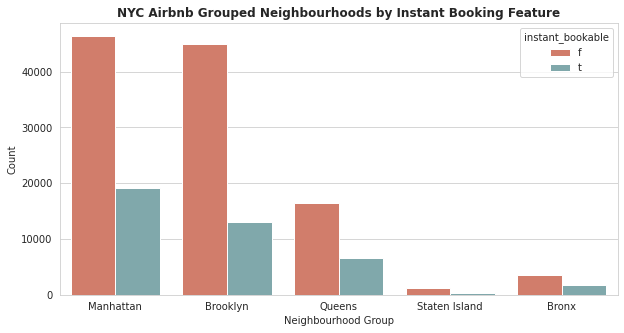

In [ ]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.instant_bookable, palette=['#E2725A',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('NYC Airbnb Grouped Neighbourhoods by Instant Booking Feature',fontweight="bold")
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');

Text(0.5, 1.0, 'NYC Airbnb Grouped Neighbourhoods by Host Type')

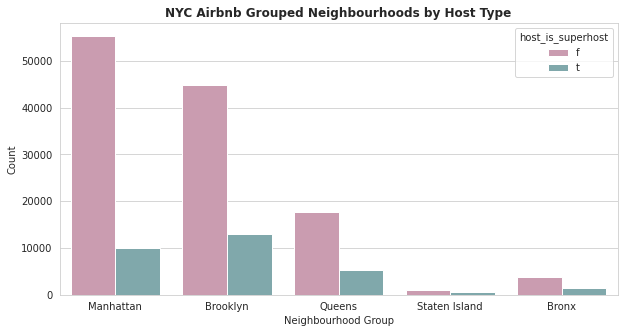

In [ ]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.host_is_superhost, palette=['#D294AF',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');
plt.title('NYC Airbnb Grouped Neighbourhoods by Host Type',fontweight="bold")

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.longitude,df_listings.latitude,hue=df_listings.host_is_superhost, palette=['#D294AF',"#4A6274"])
plt.ioff()
plt.title('NYC Airbnb Grouped Neighbourhoods by Host Type',fontweight="bold")

In [19]:
df_listings

0         44%
1         NaN
2        100%
3        100%
4         NaN
         ... 
38272     97%
38273     97%
38274     94%
38275     94%
38276    100%
Name: host_response_rate, Length: 153199, dtype: object

In [21]:
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0


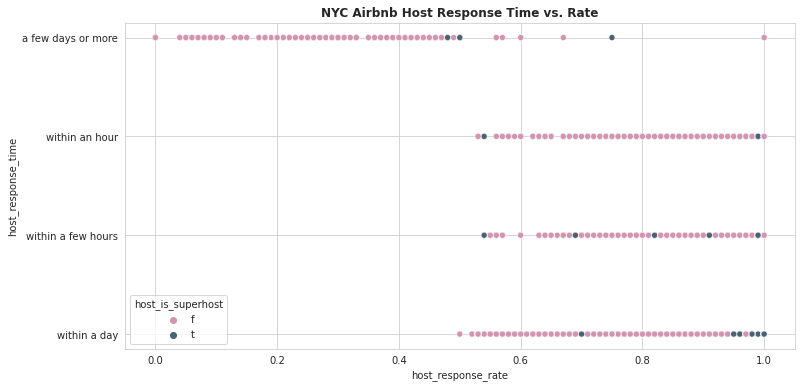

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.host_response_rate,df_listings.host_response_time,hue=df_listings.host_is_superhost, palette=['#D294AF',"#4A6274"])
plt.ioff()
plt.title('NYC Airbnb Host Response Time vs. Rate',fontweight="bold")
ax.set_xlabel('Host Response Time')
ax.set_ylabel('Host Response Rate');

#### Room types, Property type, & Number of people per booking

In [ ]:
#Unique Check
df_listings.room_type.unique()

In [ ]:
#Histogram 
freq = df_listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize =(10,5), color=['#469597','#BBC6C8','#DDBEAA','#8B9D77'],width=0.8)
plt.title('NYC Airbnb  Number of Listings by Room Types',fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Room Types', fontweight="bold");
plt.show();

In [ ]:
freq_ptype = df_listings['property_type'].value_counts().sort_values(ascending=True)
freq_ptype.plot.barh(figsize =(10,25),width=0.8, color='#DDBEAA')
plt.title('NYC Airbnb Number of Listing Types',fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Listing Types', fontweight="bold");
plt.show();

In [ ]:
feq = df_listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10,5), width=1, rot=0, color='#8B9D77')
plt.title('NYC Airbnb  Number of people per booking ', fontweight="bold")
plt.ylabel('Number of Listings', fontweight="bold")
plt.xlabel('Accommodates', fontweight="bold")
plt.show()

In [ ]:
feq = df_listings['host_response_time'].value_counts().sort_index()
feq.plot.barh(figsize=(10,5), width=0.8, rot=0, color=['#D294AF', '#DDBEAA','#37745B','#8B9D77'])
plt.title('NYC Airbnb Host Response Times ', fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Host Response Time', fontweight="bold")
plt.show()

In [ ]:
df_listings.columns

In [ ]:
df_listings.drop(columns=['host_response_time','host_is_superhost'], inplace=True)

In [ ]:
df_listings

In [ ]:
df_listings.info()

In [ ]:
df_listings.drop(columns=['property_type','room_type','room_type','accomodates','instant_bookable'], inplace=True)

In [ ]:

# Save final Listing dataframe
df_listings.to_csv('listings.csv', index=False)